In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
#outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
#se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"

# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.30/aggregate/clone_cluster_sizes"
se_cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/data/annotation/gff_A2/mergedSamples/se_cells_meta.tsv"
cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/results/clones/variants.init_knnRes.30/aggregate/cells_meta.tsv"
min_cell = 1
keep_top = 20
keep_top_single = 10 # for the plots with same donor

input_col = "Input"
use_input = False

#sample_names = "Control,Flt3l,Input"



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
%matplotlib inline

import numpy as np

In [3]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

## Load cells_meta and rename cluster labels to replace '/' with '_'

In [4]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
#se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
exp_name_map = {'CHIP_a11_Input':'CHIP_a1_Input', 'CHIP_a12_Flt3l':'CHIP_a1_Flt3l', 'CHIP_a13_Input':'CHIP_a1_Input', 
                'CHIP_b11_Control':'CHIP_b1_Control','CHIP_b12_Flt3l': 'CHIP_b1_Flt3l', 'CHIP_b13_Input': 'CHIP_b1_Input',
                'cd34norm1_Control':'cd34norm_Control', 'cd34norm1_Flt3l':'cd34norm_Flt3l'}
exp_name_map

def change_name(x):
    for e in exp_name_map:
        if e in x:
            x = x.replace(e, exp_name_map[e])
            return x
    return x
se_cells_meta.index = [change_name(x) for x in se_cells_meta.index]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID,nuclear_clusters
cd34norm_Control_AAACGAAAGAGGTCCA-1,Control,1507,1507,16929.0,2587,58,70,674,9629,3911,...,34.006648,0,High,NS < 4,4,4,2025,1719,cd34norm1_Control_AAACGAAAGAGGTCCA-1,4
cd34norm_Control_AAACGAAAGCGATACG-1,Control,4003,4003,45359.0,10546,184,184,2302,22247,9896,...,34.983832,0,High,NS < 4,0,0,5299,3845,cd34norm1_Control_AAACGAAAGCGATACG-1,0
cd34norm_Control_AAACGAAAGTCGTGAG-1,Control,1199,1199,10177.0,2450,48,60,657,2135,4827,...,20.012430,0,High,NS < 4,1,1,2066,1694,cd34norm1_Control_AAACGAAAGTCGTGAG-1,1
cd34norm_Control_AAACGAACAATAGTGA-1,Control,2950,2950,22452.0,4364,100,83,897,9233,7775,...,34.739550,0,High,NS < 4,0,0,3746,2775,cd34norm1_Control_AAACGAACAATAGTGA-1,0
cd34norm_Control_AAACGAACACAATAAG-1,Control,1398,1398,11763.0,2003,43,57,680,5547,3433,...,33.148849,0,High,NS < 4,4,4,1866,1641,cd34norm1_Control_AAACGAACACAATAAG-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1,Input,6856,6856,35511.0,7946,148,118,1467,14501,11331,...,58.767982,0,High,NS < 4,10,10,8326,5561,CHIP_b2_Input_TTTGTGTGTGGAAAGA-1,10
CHIP_b2_Input_TTTGTGTGTGGACAGT-1,Input,1880,1880,14217.0,2190,42,40,420,8229,3296,...,51.911408,0,High,NS < 4,1,1,1963,1704,CHIP_b2_Input_TTTGTGTGTGGACAGT-1,1
CHIP_b2_Input_TTTGTGTTCAGTACAC-1,Input,2998,2998,15165.0,2707,67,52,475,7195,4669,...,60.484044,0,High,NS < 4,1,1,3235,2634,CHIP_b2_Input_TTTGTGTTCAGTACAC-1,1
CHIP_b2_Input_TTTGTGTTCTATAGGC-1,Input,8513,8513,48687.0,14365,242,206,2591,7487,23796,...,34.644478,0,High,NS < 4,11,11,14161,7871,CHIP_b2_Input_TTTGTGTTCTATAGGC-1,11


In [5]:
cells_meta = pd.read_csv(cells_meta_f, sep='\t', index_col=0)
cells_meta

print('duplicated before adding exp name', cells_meta.index.duplicated().sum())

cells_meta['exp'] = ["_".join(x.split("_")[:-1]) for x in cells_meta["donor"].values]
cells_meta.index= cells_meta.apply(lambda x: f'{x["exp"]}_{x.name}', axis=1)
cells_meta
#cells_meta['donor'] = 

print('duplicated after adding exp name', cells_meta.index.duplicated().sum())


duplicated before adding exp name 300
duplicated after adding exp name 0


## merge cells meta and cluster labels

In [6]:
cells_merge_outer = pd.merge(cells_meta[["name", "donor", "condition", "lineage", "exp"]], se_cells_meta, left_index=True, right_index=True, how='outer')

In [7]:
cells_merge =pd.merge(cells_meta[["name", "condition", "donor", "lineage", "exp"]], 
                      se_cells_meta, left_index=True, right_index=True, how='inner')

In [8]:

#se_cells_meta["nuclear_clusters"] = se_cells_meta["nuclear_clusters"].apply(lambda x: "None" if pd.isnull(x) else x.replace("/", "_"))
# if "cluster_labels" in se_cells_meta.columns:
#     se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
# else:
#     se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)
#se_cells_meta

### Remove None before normalizing

In [9]:
if use_input:
    cells_merge = cells_merge[cells_merge["orig.ident"] == input_col]
cells_merge = cells_merge[cells_merge["donor"] != "None"]
cells_merge = cells_merge[cells_merge["nuclear_clusters"] != "None"]
cells_merge = cells_merge[~(cells_merge["name"].str.contains("_None"))]
cells_merge

,name,condition,donor,lineage,exp,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,...,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID,nuclear_clusters
CHIP_a1_Input_AAACGAAAGGAAACTT-1,CHIP_a1_4_15,Input,CHIP_a1_4,15,CHIP_a1,Input,3041,3041,49701.0,5002,...,54.050610,0,High,NS < 4,5,5,3505,2884,CHIP_a11_Input_AAACGAAAGGAAACTT-1,5
CHIP_a1_Input_AAACGAAGTCCAAGAG-1,CHIP_a1_3_2,Input,CHIP_a1_3,2,CHIP_a1,Input,4876,4876,62869.0,9096,...,52.069810,0,High,NS < 4,6,6,6161,4469,CHIP_a11_Input_AAACGAAGTCCAAGAG-1,6
CHIP_a1_Input_AAACGAAGTCCGAGCT-1,CHIP_a1_0_42,Input,CHIP_a1_0,42,CHIP_a1,Input,7647,7647,60574.0,11583,...,55.148866,0,High,NS < 4,0,0,9778,6201,CHIP_a11_Input_AAACGAAGTCCGAGCT-1,0
CHIP_a1_Input_AAACGAAGTTTGAAGA-1,CHIP_a1_4_13,Input,CHIP_a1_4,13,CHIP_a1,Input,7425,7425,68829.0,12010,...,54.454740,0,High,NS < 4,0,0,9266,5942,CHIP_a11_Input_AAACGAAGTTTGAAGA-1,0
CHIP_a1_Input_AAACGAATCCCAGTAA-1,CHIP_a1_2_0,Input,CHIP_a1_2,0,CHIP_a1,Input,2248,2248,30056.0,2764,...,55.375514,0,High,NS < 4,5,5,2540,2215,CHIP_a11_Input_AAACGAATCCCAGTAA-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cd34norm_Control_TTTGTGTTCACTACCC-1,cd34norm_1_4,Control,cd34norm_1,4,cd34norm,Control,1203,1203,18676.0,1809,...,28.819948,0,High,NS < 4,5,5,1768,1592,cd34norm1_Control_TTTGTGTTCACTACCC-1,5
cd34norm_Control_TTTGTGTTCCAAACCA-1,cd34norm_1_0,Control,cd34norm_1,0,cd34norm,Control,9296,9296,90247.0,25919,...,23.419710,0,High,NS < 4,10,10,16694,7661,cd34norm1_Control_TTTGTGTTCCAAACCA-1,10
cd34norm_Control_TTTGTGTTCCGATGCG-1,cd34norm_1_8,Control,cd34norm_1,8,cd34norm,Control,2704,2704,26526.0,3605,...,34.921795,0,High,NS < 4,3,3,3785,2990,cd34norm1_Control_TTTGTGTTCCGATGCG-1,3
cd34norm_Control_TTTGTGTTCCTAGAGT-1,cd34norm_3_2,Control,cd34norm_3,2,cd34norm,Control,783,783,5693.0,758,...,33.385580,0,High,NS < 4,5,5,975,906,cd34norm1_Control_TTTGTGTTCCTAGAGT-1,5


## Get counts of clusters for each donor

In [10]:
group_counts = cells_merge.groupby(["nuclear_clusters", "donor"]).size()

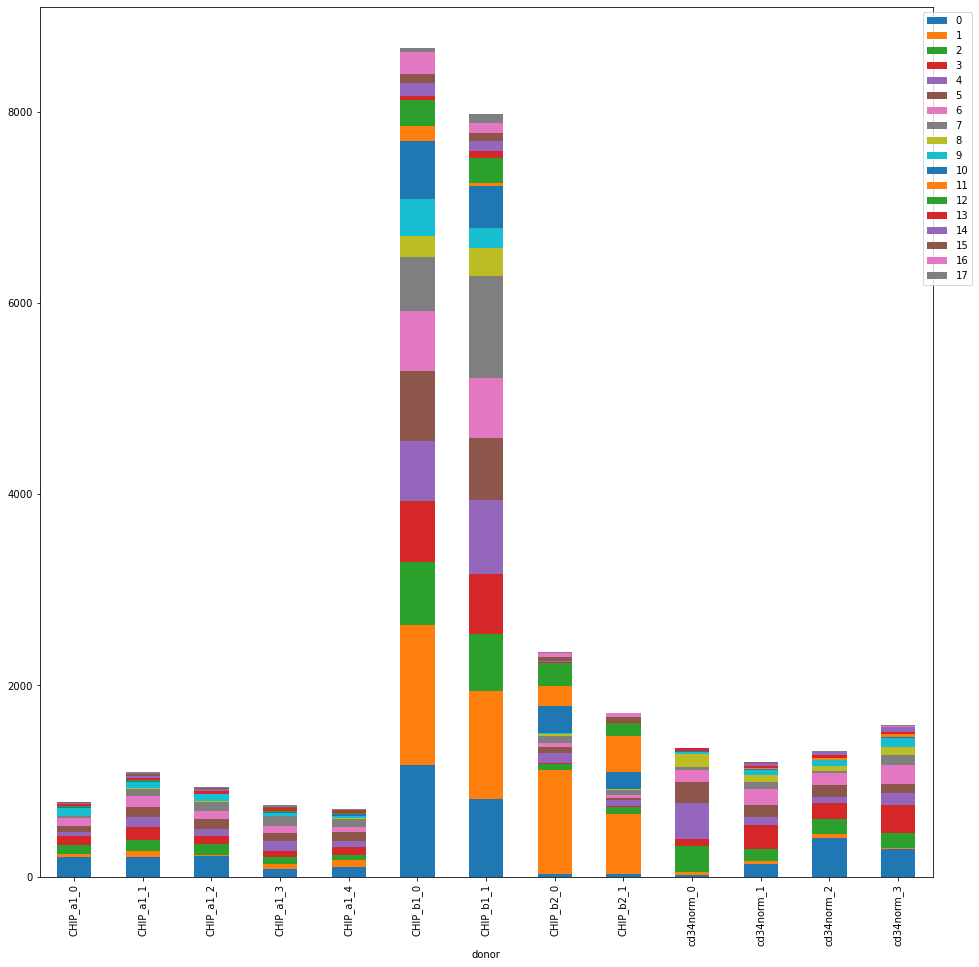

In [11]:
f, ax = plt.subplots(figsize=(16,16))
group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).plot.bar(stacked=True, ax=ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_clones_barplot_clones.pdf"))

### Normalize to each donor

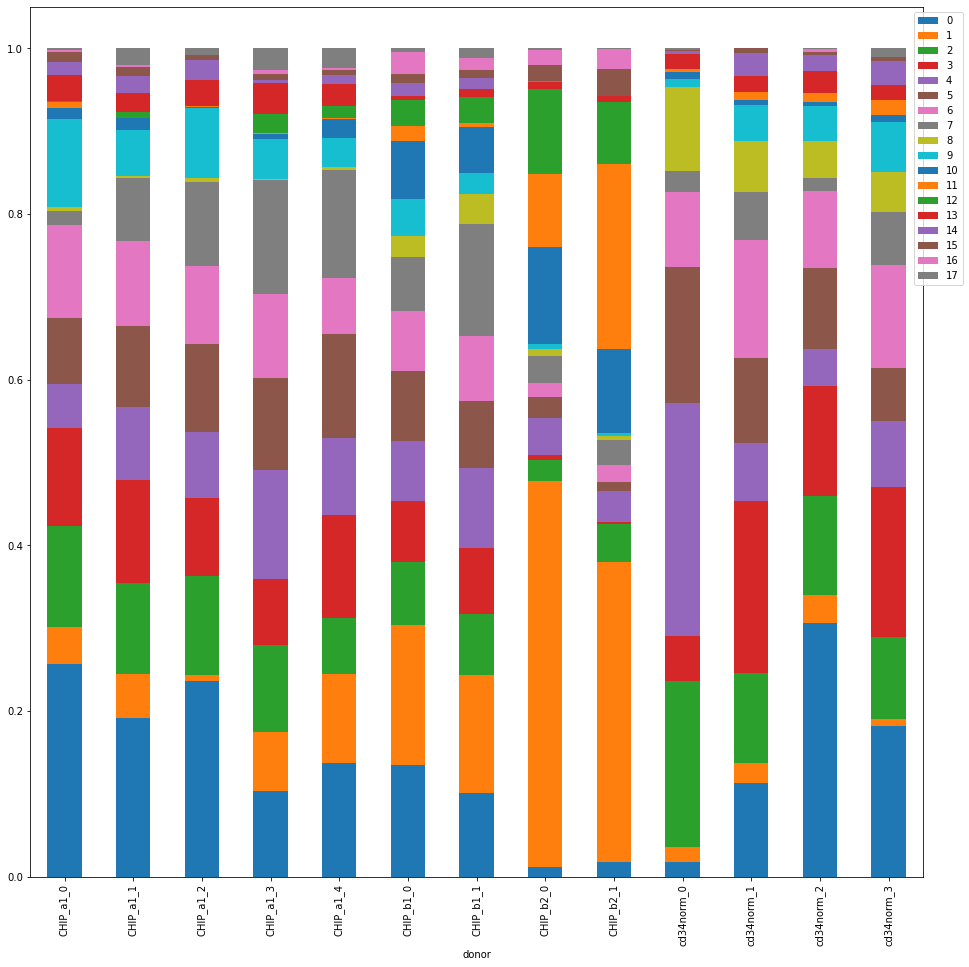

In [12]:
f, ax = plt.subplots(figsize=(16,16))
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0)#.plot.bar(stacked=True)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, ax=ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.pdf"))

## Get clone counts for each cluster

In [13]:
clone_counts = cells_merge.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]
clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]
clone_counts_filt_10_df.head()

,donor,ncells,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
name,,,,,,,,,,,,,,,,,,,,
CHIP_b1_0_0,CHIP_b1_0,925,135.0,97.0,85.0,91.0,73.0,89.0,83.0,72.0,17.0,42.0,46.0,15.0,26.0,6.0,18.0,9.0,18.0,3.0
cd34norm_3_40,cd34norm_3,669,118.0,4.0,69.0,114.0,55.0,40.0,78.0,56.0,45.0,31.0,5.0,15.0,0.0,10.0,18.0,3.0,0.0,8.0
CHIP_b1_1_0,CHIP_b1_1,647,62.0,63.0,53.0,59.0,74.0,60.0,55.0,84.0,29.0,27.0,22.0,5.0,18.0,7.0,10.0,3.0,5.0,11.0
cd34norm_2_56,cd34norm_2,590,180.0,21.0,74.0,75.0,28.0,55.0,62.0,11.0,28.0,18.0,4.0,3.0,0.0,18.0,11.0,1.0,1.0,0.0
CHIP_b1_0_1,CHIP_b1_0,583,58.0,137.0,42.0,22.0,34.0,40.0,40.0,39.0,4.0,23.0,55.0,16.0,27.0,3.0,4.0,8.0,28.0,3.0


In [14]:
def plots_donor(data, **kwargs):
    print(data.columns)
    data.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=plt.gca())
    return

# Figure: Clone-cluster barplot each donor is a panel. Unshared y-axis

In [15]:
# g = sns.FacetGrid(data=clone_counts_filt_10_df, col="donor", col_wrap=4, sharey=False, sharex=False, height=8)
# g.map_dataframe(plots_donor)
# for ax in g.axes.flatten():
#     ax.tick_params(labelbottom=True)


# Normalize per clone

In [16]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_sums

name
CHIP_a1_0_0      156
CHIP_a1_0_1      112
CHIP_a1_0_10       4
CHIP_a1_0_11       4
CHIP_a1_0_12       4
                ... 
cd34norm_3_55      1
cd34norm_3_6      33
cd34norm_3_7      16
cd34norm_3_8      45
cd34norm_3_9      11
Name: ncells, Length: 731, dtype: int64

In [17]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


sum of normed values nuclear_clusters  donor     
0                 CHIP_a1_0     11.769103
                  CHIP_a1_1      9.421174
                  CHIP_a1_2     15.330411
                  CHIP_a1_3      3.002053
                  CHIP_a1_4      7.503550
                                  ...    
17                CHIP_b2_0      0.140790
                  CHIP_b2_1      0.009091
                  cd34norm_0     0.053167
                  cd34norm_2     0.083333
                  cd34norm_3     0.110059
Name: ncells, Length: 223, dtype: float64


,donor,ncells,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
name,,,,,,,,,,,,,,,,,,,,
CHIP_a1_0_0,CHIP_a1_0,1.0,0.307692,0.00641,0.147436,0.102564,0.044872,0.070513,0.076923,0.019231,0.006410,0.128205,0.00641,0.0,0.00641,0.012821,0.019231,0.032051,0.00641,0.00641
cd34norm_0_105,cd34norm_0,1.0,0.000000,0.00000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
cd34norm_0_107,cd34norm_0,1.0,0.000000,0.00000,0.285714,0.000000,0.285714,0.285714,0.000000,0.000000,0.142857,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
cd34norm_0_108,cd34norm_0,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
cd34norm_0_109,cd34norm_0,1.0,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000


# Only top clones

In [18]:
ranks = clone_norm_df.groupby("donor")['ncells'].rank(ascending=False).astype(int)

In [19]:

clone_norm_df['rank'] = ranks
clone_counts_df['rank'] = ranks
clone_norm_df

top_clone_norm_df = clone_norm_df[clone_norm_df["rank"]<keep_top].sort_values("rank").drop("rank",axis=1)
top_clone_norm_df

top_clone_counts_df = clone_counts_df[clone_counts_df["rank"]<keep_top].sort_values("rank").drop("rank",axis=1)
top_clone_counts_df


#cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

,donor,ncells,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
name,,,,,,,,,,,,,,,,,,,,
CHIP_a1_3_0,CHIP_a1_3,102,15.0,5.0,10.0,11.0,16.0,9.0,12.0,13.0,0.0,6.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
CHIP_a1_3_16,CHIP_a1_3,5,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIP_a1_3_10,CHIP_a1_3,5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIP_a1_3_11,CHIP_a1_3,7,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIP_a1_3_19,CHIP_a1_3,8,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHIP_b1_1_15,CHIP_b1_1,189,22.0,16.0,11.0,24.0,23.0,27.0,18.0,22.0,5.0,1.0,8.0,1.0,0.0,2.0,5.0,1.0,0.0,3.0
CHIP_b1_1_17,CHIP_b1_1,191,12.0,35.0,14.0,13.0,14.0,23.0,17.0,22.0,7.0,4.0,10.0,1.0,8.0,2.0,1.0,3.0,3.0,2.0
CHIP_b1_1_14,CHIP_b1_1,195,21.0,23.0,14.0,19.0,15.0,18.0,19.0,27.0,7.0,2.0,15.0,1.0,5.0,2.0,2.0,2.0,1.0,2.0


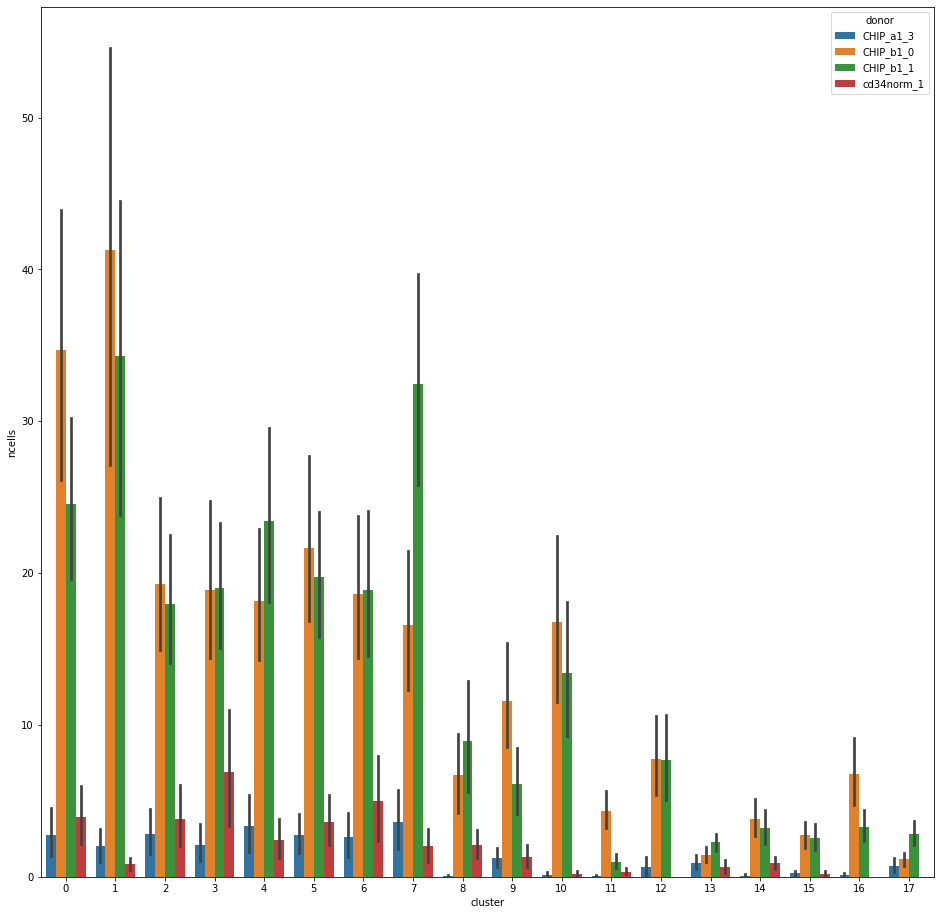

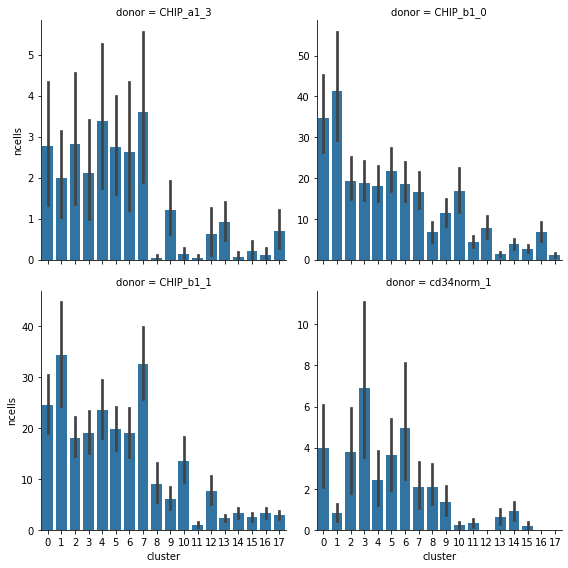

In [20]:
wide_top_clone_counts_df = top_clone_counts_df.drop("ncells", axis=1).reset_index().melt(id_vars=["donor","name"], var_name="cluster",
                                                             value_name="ncells")
wide_top_clone_counts_df


f, ax = plt.subplots(figsize=(16,16))
sns.barplot(data=wide_top_clone_counts_df, y="ncells", x="cluster", hue="donor", )

#f, ax = plt.subplots(figsize=(16,16))
g = sns.FacetGrid(data=wide_top_clone_counts_df, col="donor", sharey=False, col_wrap=2, height=4)
g.map_dataframe(sns.barplot, y="ncells", x="cluster")
#sns.barplot(data=wide_top_clone_counts_df, y="ncells", x="cluster", hue="donor", )

In [21]:
wide_top_clone_norm_df = top_clone_norm_df.drop("ncells", axis=1).reset_index().melt(id_vars=["donor","name"], var_name="cluster",
                                                             value_name="ncells")
wide_top_clone_norm_df



,donor,name,cluster,ncells
0,CHIP_a1_3,CHIP_a1_3_1,0,0.069767
1,CHIP_a1_3,CHIP_a1_3_20,0,0.123288
2,CHIP_a1_3,CHIP_a1_3_25,0,0.000000
3,CHIP_a1_3,CHIP_a1_3_24,0,0.250000
4,CHIP_a1_3,CHIP_a1_3_23,0,0.500000
...,...,...,...,...
2263,cd34norm_1,cd34norm_1_15,17,0.000000
2264,cd34norm_1,cd34norm_1_14,17,0.000000
2265,cd34norm_1,cd34norm_1_13,17,0.000000
2266,CHIP_b1_1,CHIP_b1_1_24,17,0.007463


In [46]:
hue_order = np.sort(wide_top_clone_norm_df["donor"].unique())

## Figure: Plot each col as cluster and sorted by clone.  Hue is donor

In [66]:

# f, ax = plt.subplots(figsize=(16,16))
# sns.barplot(data=wide_top_clone_norm_df, y="ncells", x="cluster", hue="donor" )

#f, ax = plt.subplots(figsize=(16,16))
# g = sns.FacetGrid(data=wide_top_clone_norm_df,  hue="donor", col="cluster", sharey=False, col_wrap=2, height=4, aspect=2)
# g.map_dataframe(sns.barplot, y="ncells", x="name")


def plot_all_clones(data, **kwargs):
    #print(data.head())
    #data = data[data["ncells"] != 0]
    data = data[data["ncells"] > 0.001]
    print(data.shape)
    order = data.sort_values(by="ncells", ascending=False)["name"].values
    #print('order', order)
    if data.shape[0] != 0:
        sns.barplot(data=data, y="ncells", x="name", hue="donor", hue_order=hue_order,
                    order=order, dodge=False)#, ax=plt.gca())
        plt.legend()
        plt.gca().set_xticks([], [])

    return


## Norm counts

(104, 4)
(91, 4)
(104, 4)
(101, 4)
(101, 4)
(106, 4)
(103, 4)
(101, 4)
(86, 4)
(94, 4)
(73, 4)
(56, 4)
(63, 4)
(75, 4)
(78, 4)
(63, 4)
(57, 4)
(59, 4)


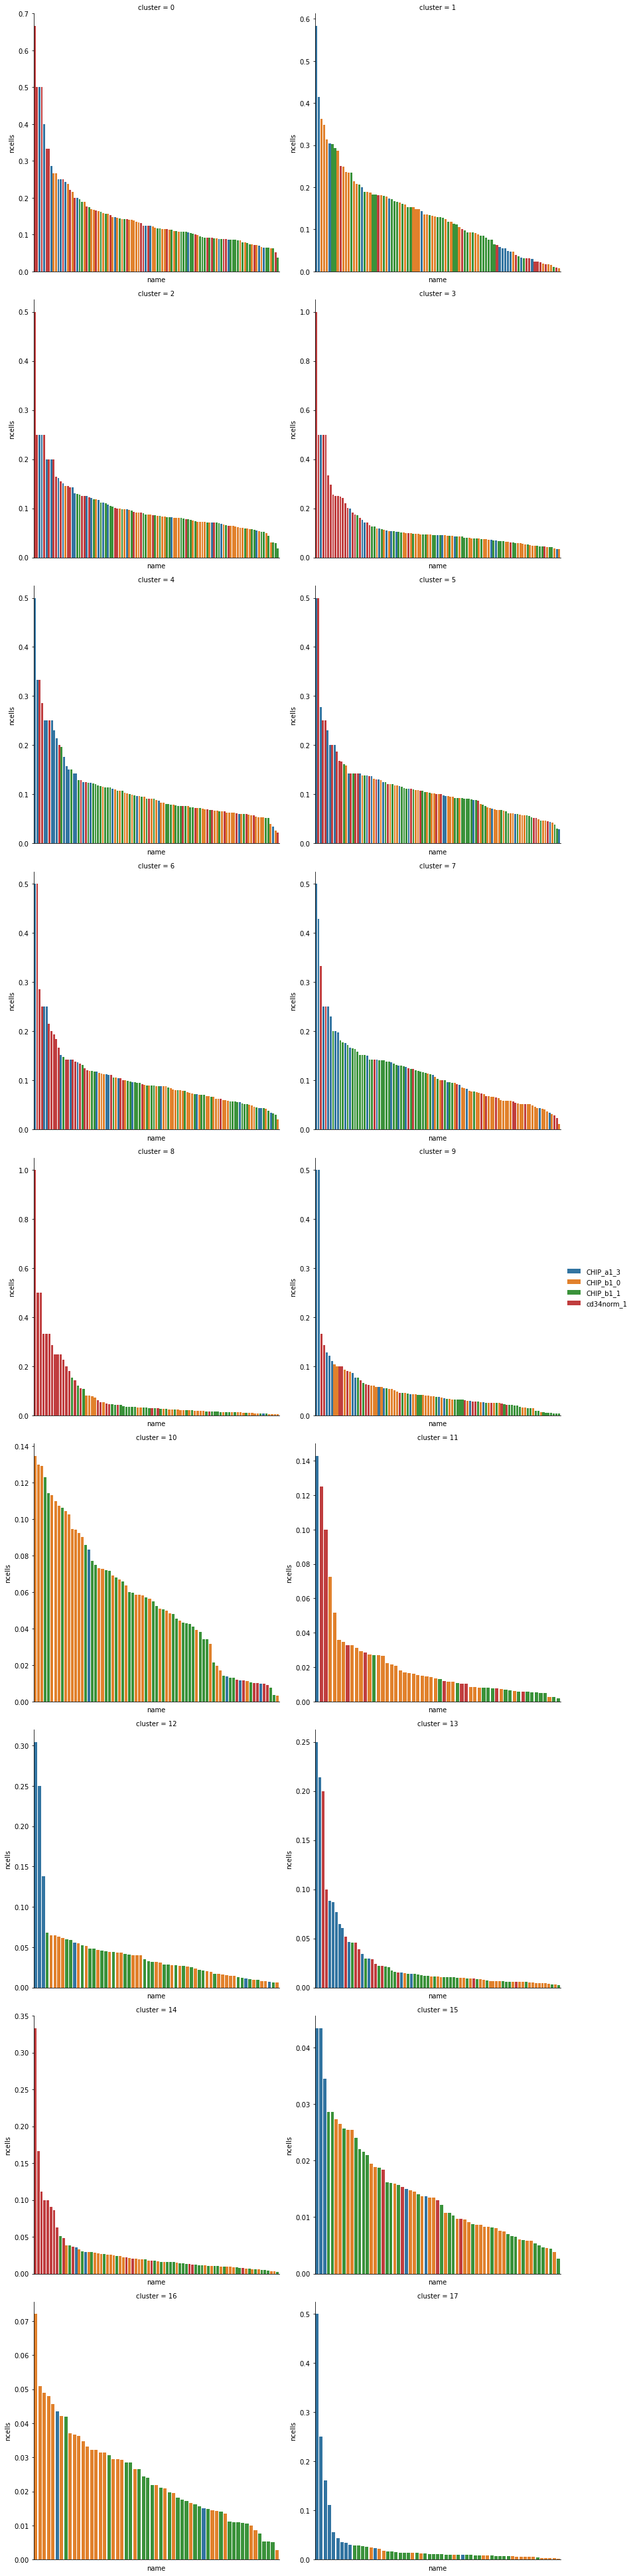

In [67]:
g = sns.FacetGrid(data=wide_top_clone_norm_df, col="cluster", col_wrap=2, 
                  sharex=False, sharey=False, height=6, legend_out=True, margin_titles=True)
g.map_dataframe(plot_all_clones)
# leg = g.axes.flat[0].get_legend()
# new_title = 'Donor'
# leg.set_title(new_title)
g.add_legend()
plt.savefig(join(outdir, "top_clones_barplot_cluster_norm.pdf"))

## Raw counts

(104, 4)
(91, 4)
(104, 4)
(101, 4)
(101, 4)
(106, 4)
(103, 4)
(101, 4)
(86, 4)
(94, 4)
(73, 4)
(56, 4)
(63, 4)
(75, 4)
(78, 4)
(63, 4)
(57, 4)
(59, 4)


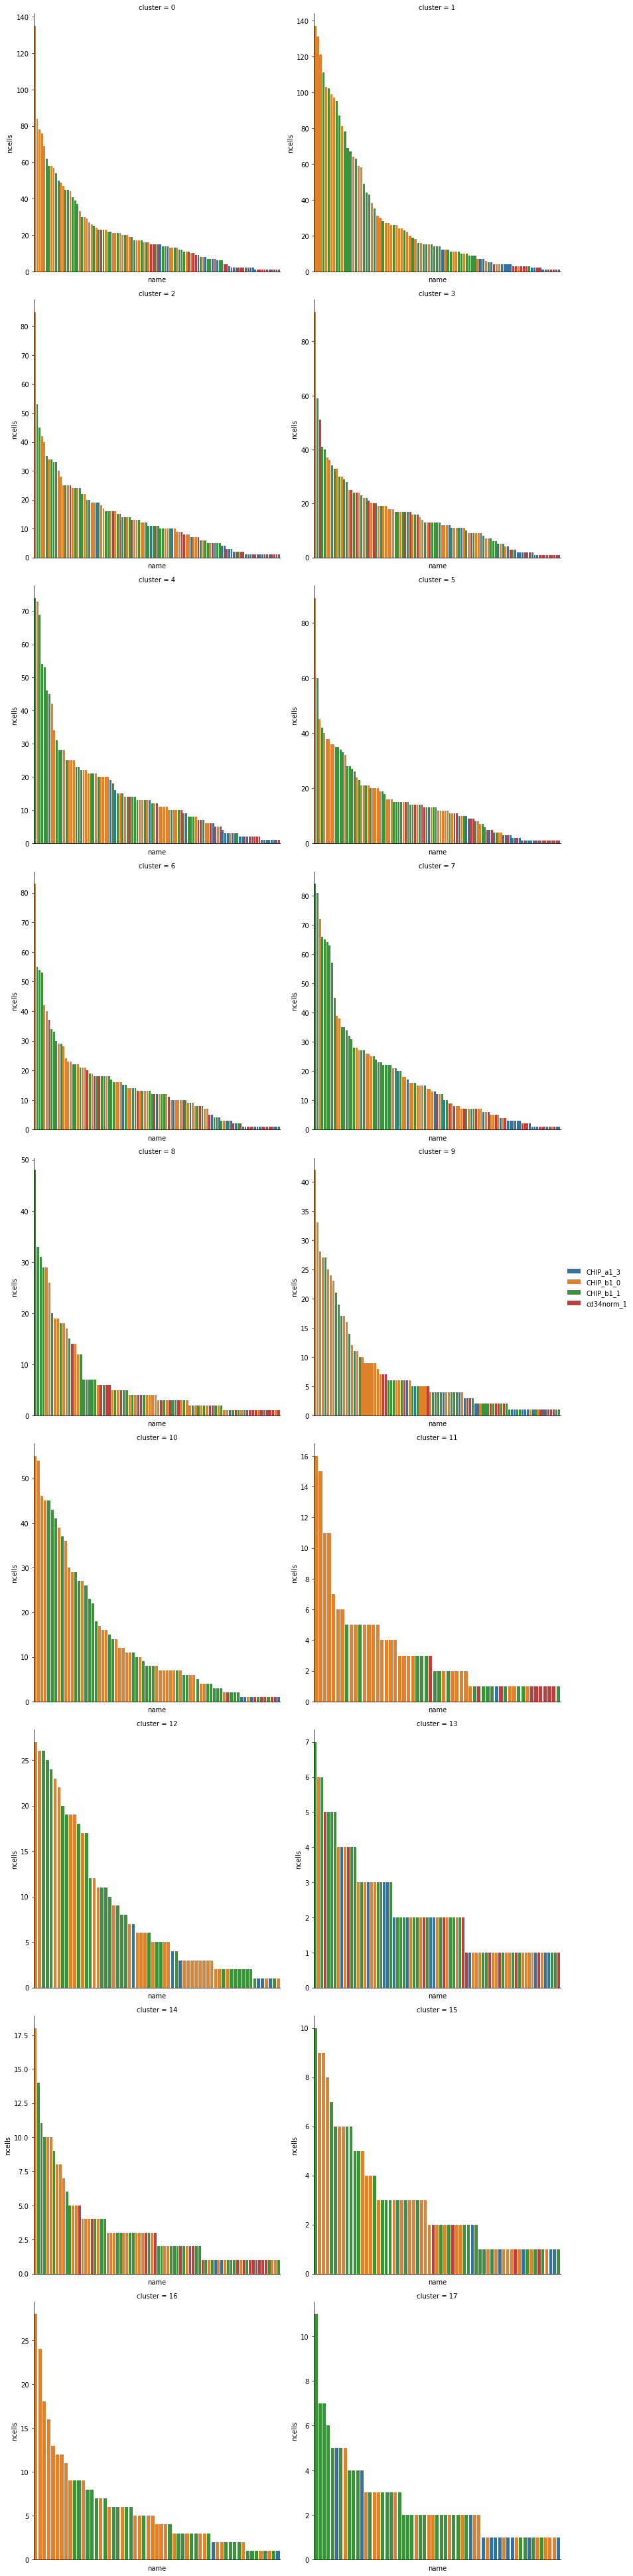

In [65]:
g = sns.FacetGrid(data=wide_top_clone_counts_df, col="cluster", col_wrap=2, 
                  sharex=False, sharey=False, height=6, legend_out=True)
g.map_dataframe(plot_all_clones)
g.add_legend()
plt.savefig(join(outdir, "top_clones_barplot_cluster.pdf"))

---

---

---